## ETHEREUM FRAUD DETECTION 


To predict weather the transaction is fraudulent or not-fraudulent using the transaction data.

## Dataset Desciption  
The dataset folder contains the following files:  
transaction_dataset.csv : (9841, 51)

 # Columns Provided in the Dataset

Index: the index number of a row

Address: the address of the ethereum account

FLAG: whether the transaction is fraud or not

Avg min between sent tnx: Average time between sent transactions for account in minutes

Avgminbetweenreceivedtnx: Average time between received transactions for account in minutes

TimeDiffbetweenfirstand_last(Mins): Time difference between the first and last transaction

Sent_tnx: Total number of sent normal transactions

Received_tnx: Total number of received normal transactions

NumberofCreated_Contracts: Total Number of created contract transactions

UniqueReceivedFrom_Addresses: Total Unique addresses from which account received transactions

UniqueSentTo_Addresses20: Total Unique addresses from which account sent transactions

MinValueReceived: Minimum value in Ether ever received

MaxValueReceived: Maximum value in Ether ever received

AvgValueReceived5Average value in Ether ever received

MinValSent: Minimum value of Ether ever sent

MaxValSent: Maximum value of Ether ever sent

AvgValSent: Average value of Ether ever sent

MinValueSentToContract: Minimum value of Ether sent to a contract

MaxValueSentToContract: Maximum value of Ether sent to a contract

AvgValueSentToContract: Average value of Ether sent to contracts

TotalTransactions(IncludingTnxtoCreate_Contract): Total number of transactions

TotalEtherSent:Total Ether sent for account address

TotalEtherReceived: Total Ether received for account address

TotalEtherSent_Contracts: Total Ether sent to Contract addresses

TotalEtherBalance: Total Ether Balance following enacted transactions

TotalERC20Tnxs: Total number of ERC20 token transfer transactions

ERC20TotalEther_Received: Total ERC20 token received transactions in Ether

ERC20TotalEther_Sent: Total ERC20token sent transactions in Ether

ERC20TotalEtherSentContract: Total ERC20 token transfer to other contracts in Ether

ERC20UniqSent_Addr: Number of ERC20 token transactions sent to Unique account addresses

ERC20UniqRec_Addr: Number of ERC20 token transactions received from Unique addresses

ERC20UniqRecContractAddr: Number of ERC20token transactions received from Unique contract addresses

ERC20AvgTimeBetweenSent_Tnx: Average time between ERC20 token sent transactions in minutes

ERC20AvgTimeBetweenRec_Tnx: Average time between ERC20 token received transactions in minutes

ERC20AvgTimeBetweenContract_Tnx: Average time ERC20 token between sent token transactions

ERC20MinVal_Rec: Minimum value in Ether received from ERC20 token transactions for account

ERC20MaxVal_Rec: Maximum value in Ether received from ERC20 token transactions for account

ERC20AvgVal_Rec: Average value in Ether received from ERC20 token transactions for account

ERC20MinVal_Sent: Minimum value in Ether sent from ERC20 token transactions for account

ERC20MaxVal_Sent: Maximum value in Ether sent from ERC20 token transactions for account

ERC20AvgVal_Sent: Average value in Ether sent from ERC20 token transactions for account

ERC20UniqSentTokenName: Number of Unique ERC20 tokens transferred

ERC20UniqRecTokenName: Number of Unique ERC20 tokens received

ERC20MostSentTokenType: Most sent token for account via ERC20 transaction

ERC20MostRecTokenType: Most received token for account via ERC20 transactions

#  Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Data Reading

In [2]:
df = pd.read_csv('transaction_dataset.csv')
df.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [3]:
df.shape

(9841, 51)

In [4]:
df.drop(['Unnamed: 0','Index','Address'],axis=1,inplace=True)
df.head()

#dropping these columns as they have no use in predicting the frauds

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [5]:
df.columns

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20

In [6]:
#we see an extra space in column names we will trim that with the strip function of strings
l=[]
for i in df.columns:
    col_name = i.strip()
    l.append(col_name)

df.columns = l

# Data Information and EXploration

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [8]:
categories = df.select_dtypes('O')
categories
#checking the categorical datatypes in dataset

,ERC20 most sent token type,ERC20_most_rec_token_type
0,Cofoundit,Numeraire
1,Livepeer Token,Livepeer Token
2,None,XENON
3,Raiden,XENON
4,StatusNetwork,EOS
...,...,...
9836,,GSENetwork
9837,,Blockwell say NOTSAFU
9838,,Free BOB Tokens - BobsRepair.com
9839,NaN,NaN


In [9]:
#check number of unique values
for i in categories:
    print(f"Unique values in {i} are: {categories[i].nunique()}")

Unique values in ERC20 most sent token type are: 305
Unique values in ERC20_most_rec_token_type are: 467


since it has lot of unique values we will remove it ... if we don't it will impact our model badly

In [10]:
df.drop(categories.columns,axis=1,inplace=True)

In [11]:
#check for numerical columns
numericals = df.select_dtypes(include=['float','int'])
numericals.describe()



,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,5086.878721,8004.851184,2.183333e+05,43.845153,523.152481,100.711721,4.800090,314.617297,44.755731,0.000003,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,21486.549974,23081.714801,3.229379e+05,325.929139,13008.821539,2885.002236,138.609682,6629.212643,239.080215,0.000225,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,3.169300e+02,0.001000,1.000000,0.426905,0.000000,0.164577,0.086184,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,17.340000,509.770000,4.663703e+04,0.095856,6.000000,1.729730,0.049126,4.999380,1.606000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,565.470000,5480.390000,3.040710e+05,2.000000,67.067040,22.000000,0.998800,61.520653,21.999380,0.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,430287.670000,482175.490000,1.954861e+06,10000.000000,800000.000000,283618.831600,12000.000000,520000.000000,12000.000000,0.020000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


In some columns we see that the min and max both are 0 so that is basically zero-variance so we will remove those columns

In [12]:
# Inspect numericals variance
numericals.var().sort_values(ascending=True)  #drop these columns

ERC20 avg val sent contract                0.000000e+00
ERC20 max val sent contract                0.000000e+00
ERC20 min val sent contract                0.000000e+00
ERC20 avg time between sent tnx            0.000000e+00
ERC20 avg time between contract tnx        0.000000e+00
ERC20 avg time between rec tnx             0.000000e+00
ERC20 avg time between rec 2 tnx           0.000000e+00
min value sent to contract                 5.080371e-08
avg value sent to contract                 1.046096e-07
total ether sent contracts                 2.660625e-07
max val sent to contract                   2.660652e-07
ERC20 uniq sent addr.1                     4.316210e-03
ERC20 uniq sent token name                 4.536185e+01
ERC20 uniq rec token name                  2.781759e+02
ERC20 uniq rec contract addr               2.974444e+02
ERC20 uniq rec addr                        6.694262e+03
ERC20 uniq sent addr                       1.107809e+04
min val sent                               1.921

In [13]:
#we will also inspect this by variance thresold method

The variance threshold is a simple baseline approach to feature selection. It removes all features which variance doesn’t meet some threshold. By default, it removes all zero-variance features, i.e., features that have the same value in all samples. We assume that features with a higher variance may contain more useful information, but note that we are not taking the relationship between feature variables or feature and target variables into account, which is one of the drawbacks of filter methods.

In [14]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(0)
vt.fit(df)

VarianceThreshold(threshold=0)

In [15]:
vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True])

In [16]:
df = df.drop(numericals.var().sort_values(ascending=True).index[0:7],axis=1)

In [17]:
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.0,58.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.0,7.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.0,8.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,0.0,11.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.0,27.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0


<AxesSubplot:xlabel='FLAG', ylabel='count'>

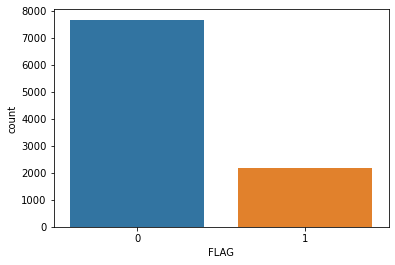

In [18]:
sns.countplot(df['FLAG'])  #IMBALANCED DATA

# Correlation Matrix

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [19]:
#basically checks the correlation between features  range = -1 to =1

In [20]:
df.corr()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.029754,-0.118533,-0.269354,-0.078006,-0.079316,-0.013711,-0.031941,-0.045584,-0.021641,...,-0.003047,-0.018527,0.011163,-4.313011e-03,0.007881,0.025364,0.025038,0.025044,0.009249,-0.018047
Avg min between sent tnx,-0.029754,1.000000,0.060979,0.214722,-0.032289,-0.035735,-0.006186,-0.015912,-0.017688,-0.014886,...,-0.012754,0.045615,0.004673,-2.455932e-03,-0.003149,-0.001687,-0.002020,-0.001965,0.000529,0.047202
Avg min between received tnx,-0.118533,0.060979,1.000000,0.303897,-0.040419,-0.053478,-0.008378,-0.029571,-0.025747,-0.045753,...,-0.014698,-0.014932,-0.008319,-3.544424e-03,-0.005606,-0.003758,-0.003780,-0.003727,-0.019896,-0.014966
Time Diff between first and last (Mins),-0.269354,0.214722,0.303897,1.000000,0.154480,0.148376,-0.003881,0.037043,0.071140,-0.084996,...,0.019961,0.319176,-0.010543,4.651212e-02,0.049020,-0.006852,-0.006268,-0.006802,0.263939,0.324288
Sent tnx,-0.078006,-0.032289,-0.040419,0.154480,1.000000,0.198455,0.320603,0.130064,0.670014,0.024015,...,-0.008379,0.219665,-0.003868,4.291143e-03,0.008843,-0.001557,-0.001019,-0.001415,0.079728,0.220614
Received Tnx,-0.079316,-0.035735,-0.053478,0.148376,0.198455,1.000000,-0.003838,0.648655,0.164112,-0.022936,...,0.337727,0.201686,-0.004464,1.537920e-02,0.019126,-0.001899,-0.000744,-0.000918,0.042681,0.202747
Number of Created Contracts,-0.013711,-0.006186,-0.008378,-0.003881,0.320603,-0.003838,1.000000,-0.002211,0.084598,-0.001542,...,-0.001083,0.028986,-0.000788,9.202945e-04,0.002052,-0.000092,0.000149,-0.000070,0.006033,0.030089
Unique Received From Addresses,-0.031941,-0.015912,-0.029571,0.037043,0.130064,0.648655,-0.002211,1.000000,0.159829,-0.012939,...,0.241494,0.147741,-0.001999,1.603025e-03,0.003592,-0.001044,-0.000261,-0.000546,0.040674,0.148851
Unique Sent To Addresses,-0.045584,-0.017688,-0.025747,0.071140,0.670014,0.164112,0.084598,0.159829,1.000000,0.070145,...,-0.005345,0.237351,-0.002333,3.598439e-03,0.005246,-0.000967,-0.000439,-0.000827,0.084897,0.237520
min value received,-0.021641,-0.014886,-0.045753,-0.084996,0.024015,-0.022936,-0.001542,-0.012939,0.070145,1.000000,...,-0.007365,-0.003216,-0.001154,-1.670077e-03,-0.002852,-0.001498,-0.001529,-0.001477,-0.028810,-0.002695


<AxesSubplot:>

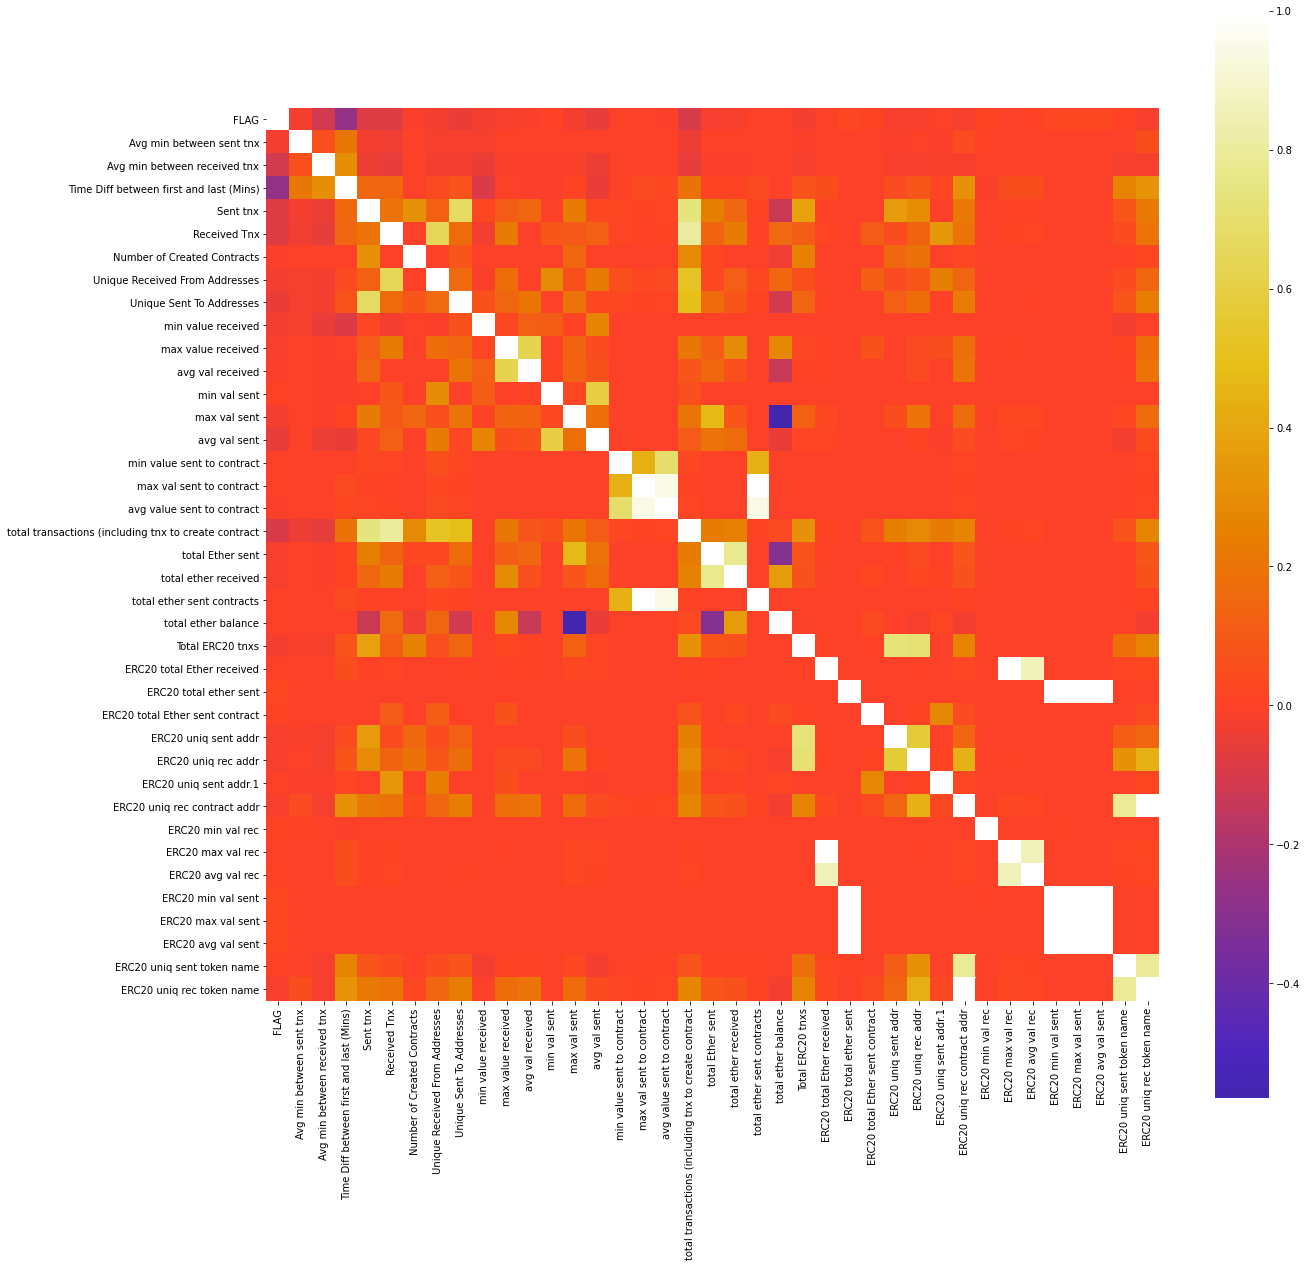

In [21]:

corr_matrix = df.corr()
corr_col = corr_matrix.index

plt.figure(figsize=(20,20))
sns.heatmap(df[corr_col].corr(), annot=False, cmap='CMRmap', center=0, square=True)

checking for null values as it is not good for the model

In [22]:
df.isna().sum().sort_values(ascending=False)

ERC20 uniq rec token name                               829
ERC20 uniq sent addr.1                                  829
Total ERC20 tnxs                                        829
ERC20 total Ether received                              829
ERC20 total ether sent                                  829
ERC20 total Ether sent contract                         829
ERC20 uniq sent addr                                    829
ERC20 uniq rec addr                                     829
ERC20 uniq rec contract addr                            829
ERC20 min val rec                                       829
ERC20 max val rec                                       829
ERC20 avg val rec                                       829
ERC20 min val sent                                      829
ERC20 max val sent                                      829
ERC20 avg val sent                                      829
ERC20 uniq sent token name                              829
total ether received                    

## CHECKING IF DATASET IS SKEWED OR NOT

#Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

To replace these null values with mean the data has to be of normal distributution but if we see some skewness we will update it with median values

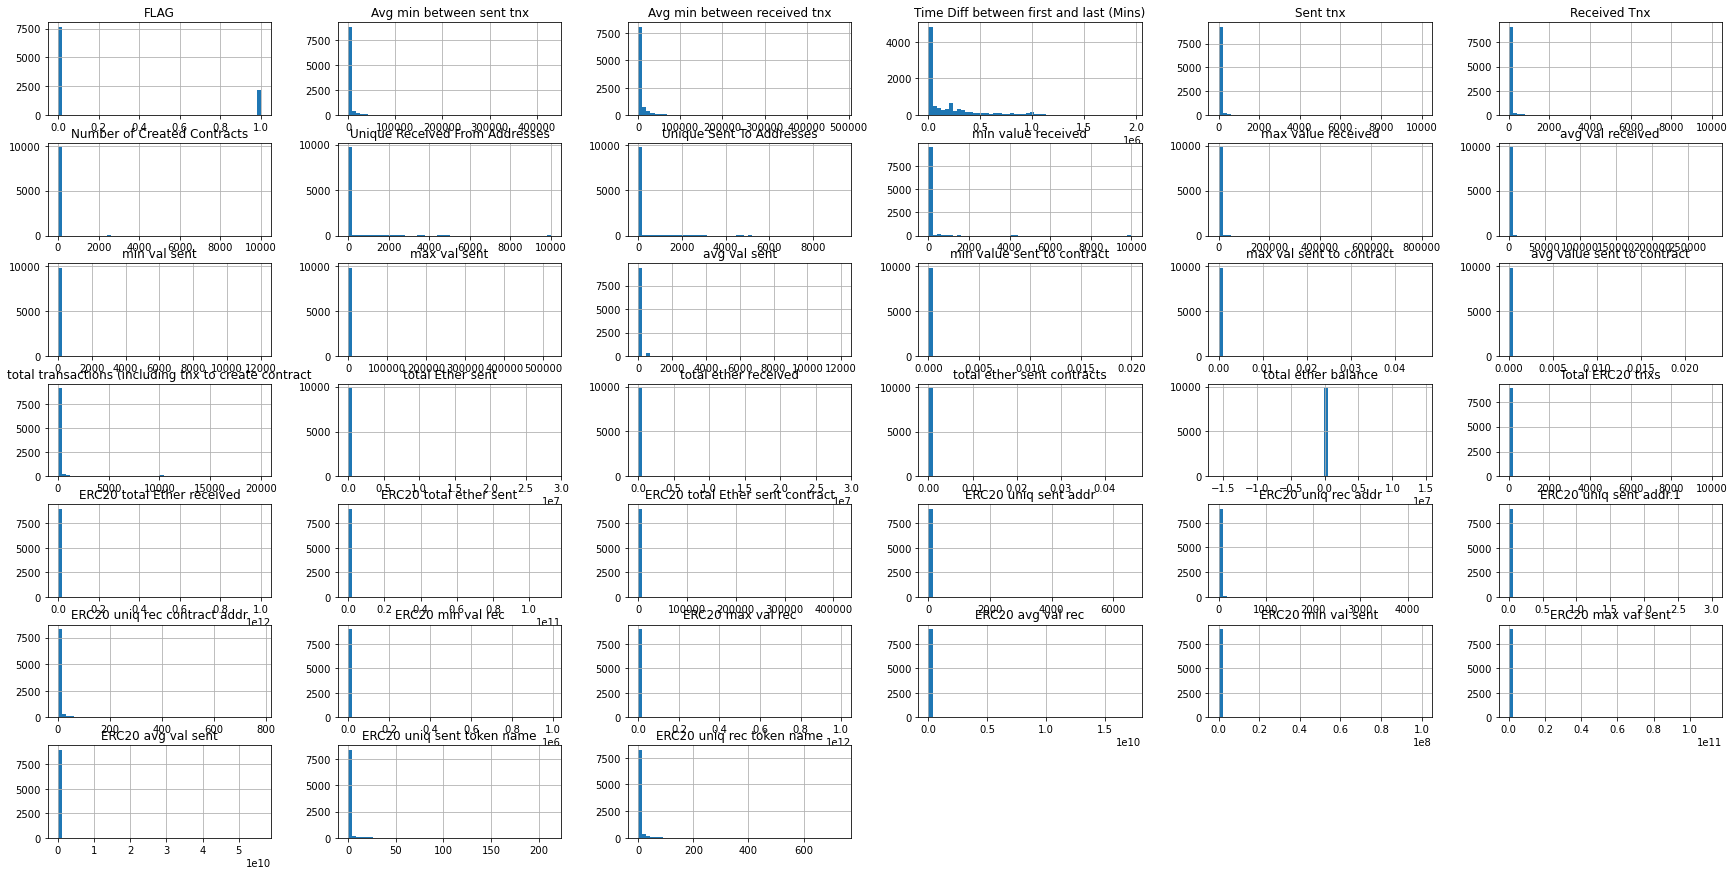

In [23]:
df.hist(bins=50,figsize=(30,15))
plt.show()   #we see some skewness

<AxesSubplot:xlabel='Time Diff between first and last (Mins)', ylabel='Density'>

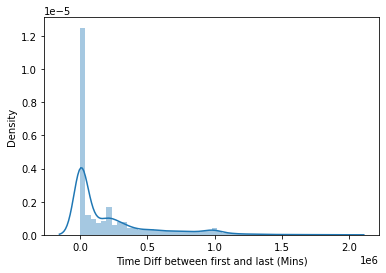

In [24]:
sns.distplot(df['Time Diff between first and last (Mins)'])

<AxesSubplot:xlabel='ERC20 max val rec', ylabel='Density'>

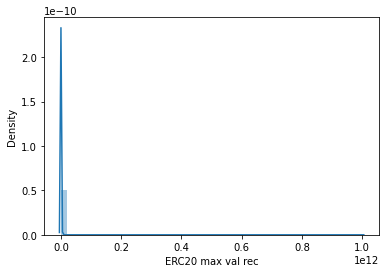

In [25]:
sns.distplot(df['ERC20 max val rec'])

In [26]:
df.var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [27]:
df['ERC20 avg val rec'].value_counts()

0.000000       4592
1.337000        388
13.370000       294
0.668500         47
100.000000       36
               ... 
3.207407          1
2.319728          1
1200.737423       1
0.650009          1
2.046217          1
Name: ERC20 avg val rec, Length: 3380, dtype: int64

### drop columns that holds only zeros and highly correlated features

In [28]:
vt = VarianceThreshold(0.5)
vt.fit(df)

VarianceThreshold(threshold=0.5)

In [29]:
vt.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [30]:
vt

VarianceThreshold(threshold=0.5)

In [31]:
len(df.columns[vt.get_support()])

33

In [32]:
#one col is flag we will not remove that

In [33]:
constant_columns = [column for column in df.columns[1:]
                    if column not in df.columns[1:][vt.get_support()[1:]]]

print(len(constant_columns))

5


In [34]:
constant_columns

['min value sent to contract',
 'max val sent to contract',
 'avg value sent to contract',
 'total ether sent contracts',
 'ERC20 uniq sent addr.1']

In [35]:
df = df.drop(constant_columns,axis=1)

In [36]:
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,54.0,58.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,5.0,7.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,7.0,8.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,11.0,11.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,23.0,27.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0


#### Now fill the nan values with median as we removed all the low variance features

In [37]:
# Replace missings of numerical variables with median
df.fillna(df.median(), inplace=True)

In [38]:
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,54.0,58.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,5.0,7.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,7.0,8.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,11.0,11.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,23.0,27.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0


In [39]:
df.shape

(9841, 34)

<AxesSubplot:>

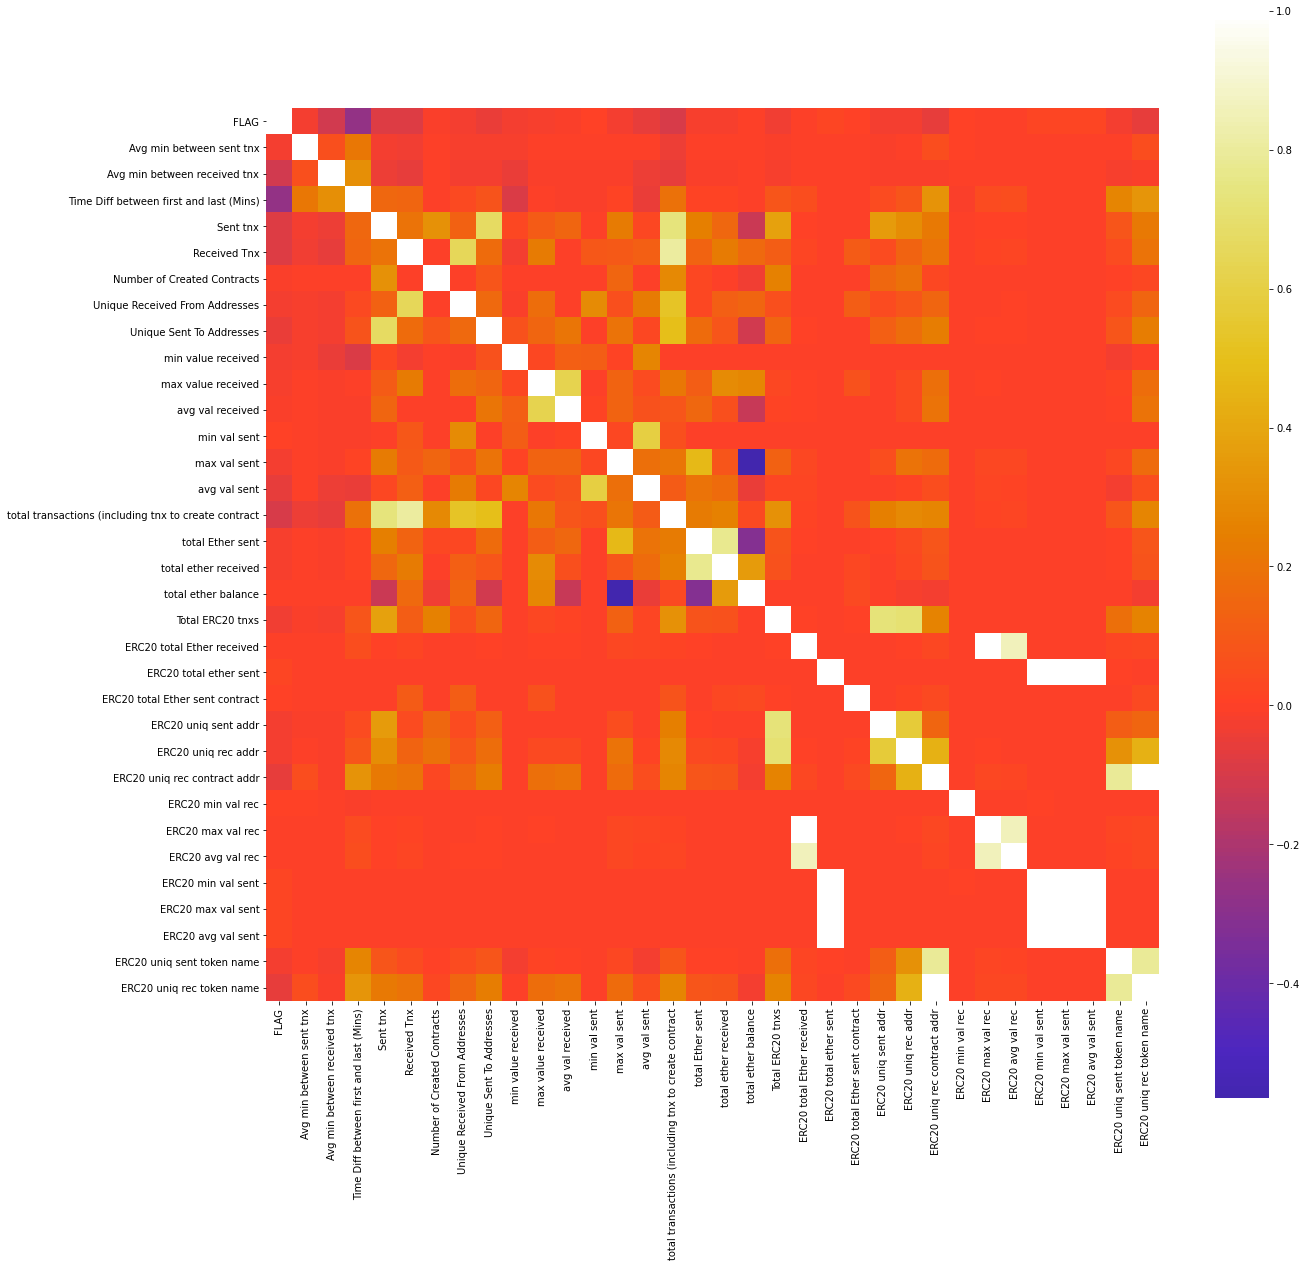

In [40]:
#recheck the correlation matrix
corr_matrix = df.corr()
corr_col = corr_matrix.index

plt.figure(figsize=(20,20))
sns.heatmap(df[corr_col].corr(), annot=False,cmap='CMRmap', center=0, square=True)

## we see that some features are highly coreleated so we will remove them

In [41]:
drop = ['Unique Received From Addresses',
'Unique Sent To Addresses',
'min value received',
'min val sent',
'max val sent',
'total transactions (including tnx to create contract',
'total ether received']

In [42]:
#we wil also check its variance

df[drop].var()

Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
total transactions (including tnx to create contract    1.828997e+06
total ether received                                    1.326451e+11
dtype: float64

In [43]:
df.var().sort_values(ascending=True)[0:8]

FLAG                                0.172411
ERC20 uniq sent token name         41.688189
ERC20 uniq rec token name         255.869925
ERC20 uniq rec contract addr      273.559908
ERC20 uniq rec addr              6133.643300
ERC20 uniq sent addr            10147.234678
min val sent                    19212.643823
Number of Created Contracts     20006.852948
dtype: float64

<AxesSubplot:xlabel='Unique Received From Addresses', ylabel='Density'>

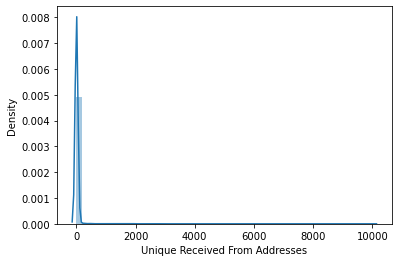

In [44]:
sns.distplot(df['Unique Received From Addresses'])

In [45]:
# we can remove them as their variance is very low  (further it depends on domain knowledge)



In [46]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [47]:
x.shape

(9841, 33)

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, Each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees.

To perform feature selection using the above forest structure, during the construction of the forest, for each feature, the normalized total reduction in the mathematical criteria used in the decision of feature of split (Gini Index if the Gini Index is used in the construction of the forest) is computed. This value is called the Gini Importance of the feature. To perform feature selection, each feature is ordered in descending order according to the Gini Importance of each feature and the user selects the top k features according to his/her choice.

In [48]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

In [49]:
drop

['Unique Received From Addresses',
 'Unique Sent To Addresses',
 'min value received',
 'min val sent',
 'max val sent',
 'total transactions (including tnx to create contract',
 'total ether received']

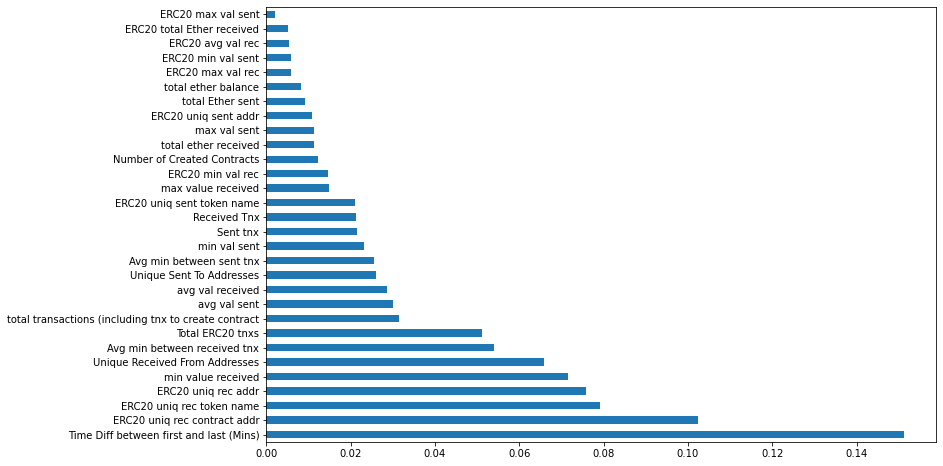

In [50]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()


In [51]:
#finally after analysis on features we will drop the lowest important features

In [52]:
df = df.drop(feat_importances.sort_values(ascending=True)[0:12].index,axis=1)

In [53]:
df.shape

(9841, 22)

In [54]:
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,min val sent,avg val sent,total transactions (including tnx to create contract,total ether received,Total ERC20 tnxs,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,0.00,1.200681,810,586.466675,265.0,54.0,58.0,0.0,39.0,57.0
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,0.00,0.032844,102,3.085478,8.0,5.0,7.0,0.0,1.0,7.0
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.05,1.794308,12,3.589057,8.0,7.0,8.0,0.0,0.0,8.0
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,0.00,70.001834,34,895.399559,14.0,11.0,11.0,0.0,1.0,11.0
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,0.00,0.022688,4619,53.421897,42.0,23.0,27.0,0.0,6.0,27.0


<AxesSubplot:>

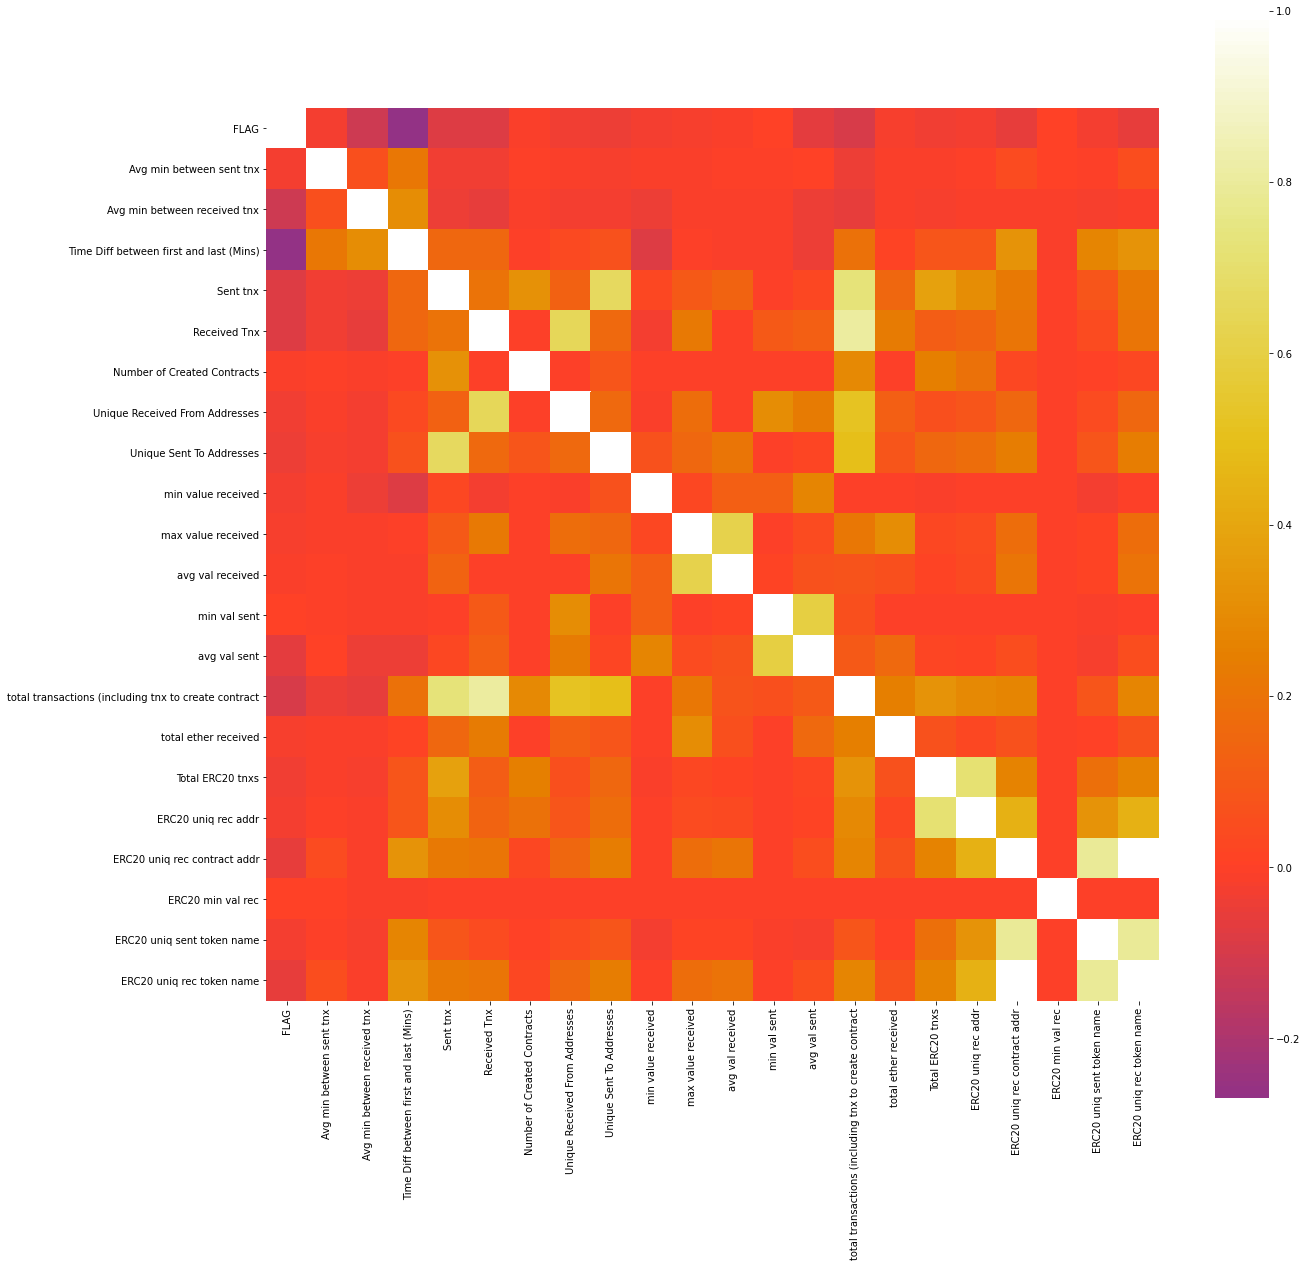

In [55]:
#recheck the correlation matrix
corr_matrix = df.corr()
corr_col = corr_matrix.index

plt.figure(figsize=(20,20))
sns.heatmap(df[corr_col].corr(), annot=False,cmap='CMRmap', center=0, square=True)

# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

In [56]:
def box(s):
    sns.boxplot(s)

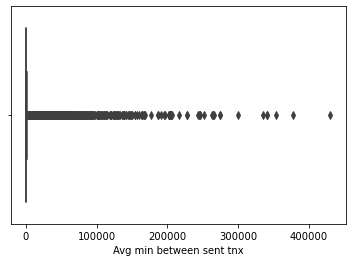

In [57]:
box(df.iloc[:,1])

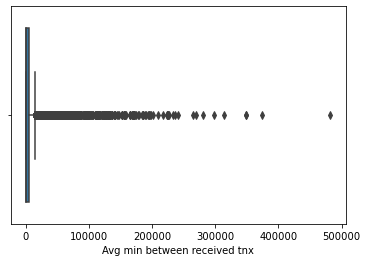

In [58]:
box(df.iloc[:,2])

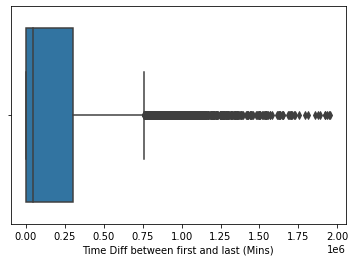

In [59]:
box(df.iloc[:,3])

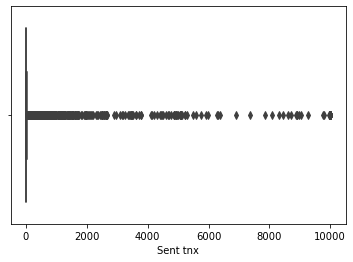

In [60]:
box(df.iloc[:,4])

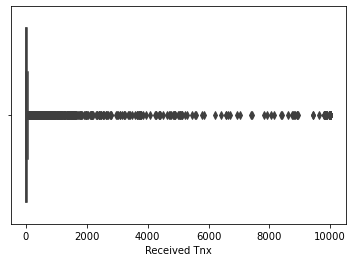

In [61]:
box(df.iloc[:,5])

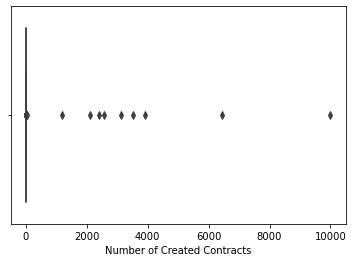

In [62]:
box(df.iloc[:,6])

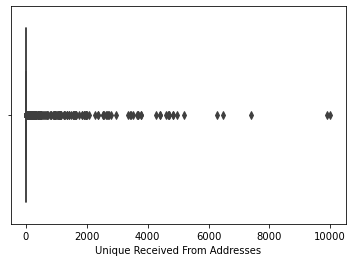

In [63]:
box(df.iloc[:,7])

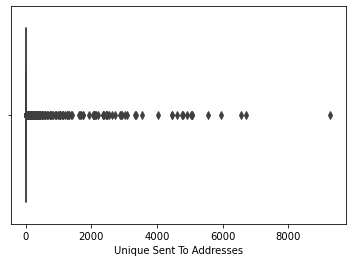

In [64]:
box(df.iloc[:,8])

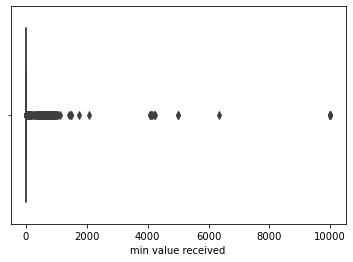

In [65]:
box(df.iloc[:,9])

#### we have ouliners but our model is robust to outliners
    Random Forest
    Xgboost
    Decision Tree

In [66]:
df.shape

(9841, 22)

# MODEL BUILDING

In [67]:
X  = df.iloc[:,1:]
y = df['FLAG']

In [68]:
x

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,...,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name
0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,...,54.0,58.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,39.0,57.0
1,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,...,5.0,7.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,...,7.0,8.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,...,11.0,11.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,...,23.0,27.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,...,2.0,2.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,2.0
9837,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,...,1.0,1.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,1.0
9838,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,...,5.0,5.0,0.00,1.500000e+03,300.693901,0.000000,0.000000e+00,0.000000,0.0,5.0
9839,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,...,1.0,1.0,0.00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.0,1.0


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
#Split into training (80%) and testing set (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8364, 21) (8364,)
(1477, 21) (1477,)


In [71]:
y_train.value_counts()

0    6509
1    1855
Name: FLAG, dtype: int64

In [72]:
#we need to handle this imbalance otherwise it will impact the model

In [73]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.75)

In [74]:
X_train,y_train = os.fit_resample(X_train,y_train)
y_train.value_counts()

0    6509
1    4881
Name: FLAG, dtype: int64

In [75]:
X_train.shape,y_train.shape

((11390, 21), (11390,))

In [76]:
#We can also use smote

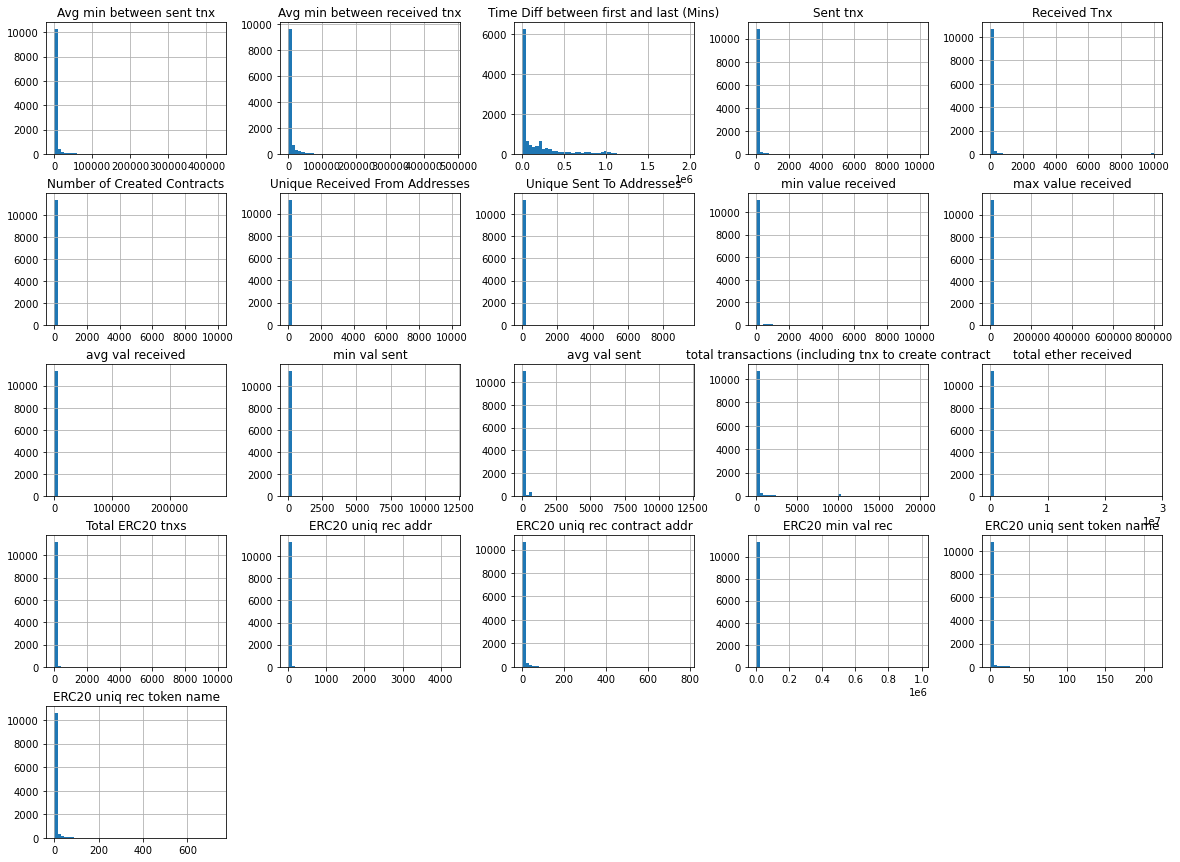

In [77]:
X_train.hist(bins=50,figsize=(20,15))  #see the distribution is not scaled
plt.show()

# Power Transformer

Apply a power transform featurewise to make data more Gaussian-like.

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

By default, zero-mean, unit-variance normalization is applied to the transformed data.

#### we used power transformer as it converts the data more like a gaussian distribution for instead of using standard scaler
further on tuning the model you will find power transformer performed better that standard scaler

In [78]:
# Importing Power Transformer Scaler from sklearn.preprocessing
from sklearn.preprocessing import PowerTransformer
# Model Creation
p_scaler = PowerTransformer()

In [79]:
# fitting and transforming the model on A(train_inputs)
X_train_scaled = p_scaler.fit_transform(X_train)
X_test_scaled = p_scaler.transform(X_test)

In [80]:
X_train_scaled.shape,y_train.shape

((11390, 21), (11390,))

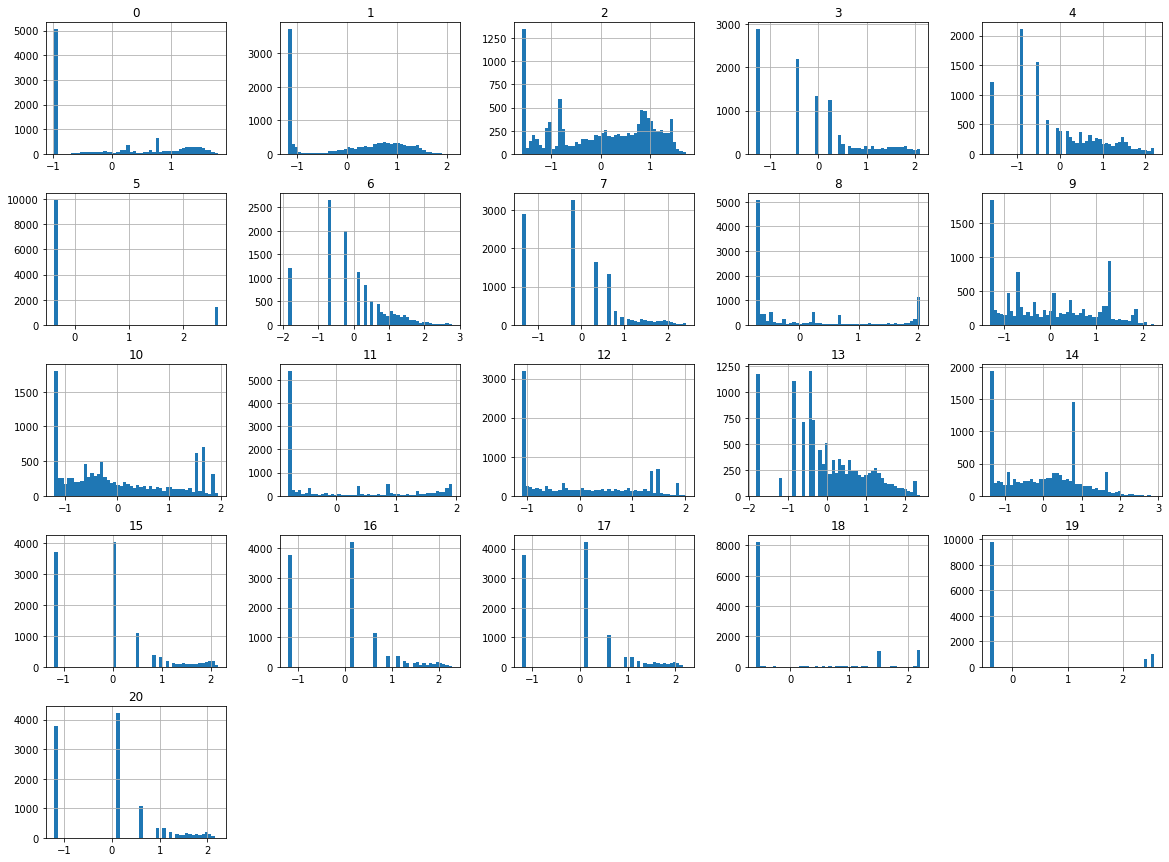

In [81]:
pd.DataFrame(X_train_scaled).hist(bins=50,figsize=(20,15))   #scaled
plt.show()

# IMporting Models

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,accuracy_score

### we will check the metrics for classification model in all the models and take the best model

In [83]:
models = {'Xgboost':XGBClassifier(),
          'Decision Tree':DecisionTreeClassifier(),
          'Random Forest':RandomForestClassifier()}


for k,v in models.items():
    print(f"My model is: {k}")
    model = v
    model.fit(X_train_scaled,y_train)
    
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    
    
    #TRAIN
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall = recall_score(y_train,y_train_pred)
    model_train_aoc_auc = roc_auc_score(y_train,y_train_pred)
    
    
    #TEST
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall = recall_score(y_test,y_test_pred)
    model_test_aoc_auc = roc_auc_score(y_test,y_test_pred)
    
    
    print(k)
    print('PERFORMANCE OF TRAINING DATA')
    print(f"Accuracy: {model_train_accuracy}")
    print(f"F1-Score: {model_train_f1}")
    print(f"Precision: {model_train_precision}")
    print(f"Recall: {model_train_recall}")
    print(f"Roc_AUC: {model_train_aoc_auc}")
    
    print('------------------------------------------------')
    
    print('PERFORMACE OF TESTING DATA')
    print(f"Accuracy: {model_test_accuracy}")
    print(f"F1-Score: {model_test_f1}")
    print(f"Precision: {model_test_precision}")
    print(f"Recall: {model_test_recall}")
    print(f"Roc_AUC: {model_test_aoc_auc}")
    
    
    
    print('='*35)
    print()
    
    

My model is: Xgboost
[17:15:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost
PERFORMANCE OF TRAINING DATA
Accuracy: 1.0
F1-Score: 1.0
Precision: 1.0
Recall: 1.0
Roc_AUC: 1.0
------------------------------------------------
PERFORMACE OF TESTING DATA
Accuracy: 0.991198375084631
F1-Score: 0.9797191887675507
Precision: 0.9905362776025236
Recall: 0.9691358024691358
Roc_AUC: 0.9832669472016103

My model is: Decision Tree
Decision Tree
PERFORMANCE OF TRAINING DATA
Accuracy: 1.0
F1-Score: 1.0
Precision: 1.0
Recall: 1.0
Roc_AUC: 1.0
------------------------------------------------
PERFORMACE OF TESTING DATA
Accuracy: 0.968855788761002
F1-Score: 0.9296636085626911
Precision: 0.9212121212121213
Recall: 0.9382716049382716
Roc_AUC: 0.957860

#### we can also check the confusion matrix for all the models we get xgboost as the best model

In [84]:
models = {'Xgboost':XGBClassifier(),
          'Decision Tree':DecisionTreeClassifier(),
          'Random Forest':RandomForestClassifier()}


for k,v in models.items():
    print(f"My model is: {k}")
    model = v
    model.fit(X_train_scaled,y_train)
    
    
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    print(confusion_matrix(y_test,y_test_pred))

My model is: Xgboost
[17:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[1150    3]
 [  10  314]]
My model is: Decision Tree
[[1131   22]
 [  21  303]]
My model is: Random Forest
[[1145    8]
 [  17  307]]


#### so the best model is XGBoost so we will go for hyper parameter tuning for this model

In [222]:
## Hyper Parameter Optimization for xgboost

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [223]:
from sklearn.model_selection import RandomizedSearchCV

Randomized search on hyper parameters.

RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by n_iter.

If all parameters are presented as a list, sampling without replacement is performed. If at least one parameter is given as a distribution, sampling with replacement is used. It is highly recommended to use continuous distributions for continuous parameters.

In [224]:
model = XGBClassifier()

In [226]:
random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=5,verbose=2,n_jobs=-1)
    
random.fit(X_train_scaled,y_train)

    

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[17:30:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                           reg_alpha=None, reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   verbose=2)

In [88]:
random.best_params_  #checking the best params for the model

NameError: name 'random' is not defined

### After a lot of hyper paramter tuning we take the final model as xgboost for final predictions

In [114]:
model = XGBClassifier(n_estimators = 150 ,min_child_weight= 3,max_depth= 6,learning_rate= 0.15,gamma= 0.1,colsample_bytree= 0.5)

In [115]:
model.fit(X_train_scaled,y_train)  #fitting the train set in the model

[17:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [131]:
model.n_features_in_  #checking the features that are taken by the model

21

In [134]:
X_train.shape

(11390, 21)

In [135]:
feat_imporatance = {}   #seeing the importance of each features in the model
for i in range(0,X_train.shape[1]):
    feat_imporatance[X_train.columns[i]] = model.feature_importances_[i]

In [137]:
feat_imporatance  

{'Avg min between sent tnx': 0.012190123,
 'Avg min between received tnx': 0.02728497,
 'Time Diff between first and last (Mins)': 0.11741182,
 'Sent tnx': 0.018301455,
 'Received Tnx': 0.011763668,
 'Number of Created Contracts': 0.062382236,
 'Unique Received From Addresses': 0.028917449,
 'Unique Sent To Addresses': 0.0041298936,
 'min value received': 0.007586118,
 'max value received': 0.0073274286,
 'avg val received': 0.013881074,
 'min val sent': 0.013310131,
 'avg val sent': 0.005369239,
 'total transactions (including tnx to create contract': 0.061271787,
 'total ether received': 0.0214781,
 'Total ERC20 tnxs': 0.21112943,
 'ERC20 uniq rec addr': 0.2212441,
 'ERC20 uniq rec contract addr': 0.009510953,
 'ERC20 min val rec': 0.026521109,
 'ERC20 uniq sent token name': 0.04836213,
 'ERC20 uniq rec token name': 0.07062682}

In [116]:
accuracy_score(model.predict(X_test_scaled),y_test)  #checking for the accuracy of the model

0.991875423155044

## ROC curve

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

TPR/RECALL/SENSITIVITY = TP/(TP+FN)

FPR = FP/(TN+FP)

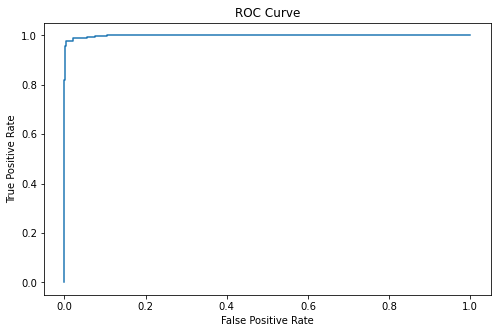

In [117]:
plt.figure(figsize=(8,5))
#calculate fpr,tpr
fpr,tpr,thresholds = roc_curve(y_test,model.predict_proba(X_test_scaled)[::,1])

#calculate area under the curve to disply
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



score = (correctly_classified_point)/(total number of points given to model to predict)

In [118]:
accuracy_score(y_test,model.predict(X_test_scaled))

0.991875423155044

#### What is a classification report?
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below.

In [119]:
print(classification_report(y_test,model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1153
           1       0.99      0.98      0.98       324

    accuracy                           0.99      1477
   macro avg       0.99      0.99      0.99      1477
weighted avg       0.99      0.99      0.99      1477



#### What is confusion matrix?
Image result for confusion matrix
A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

A confusion matrix prints the correct and also incorrect values in number count . It helps us for a good Data Visualization It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

<AxesSubplot:>

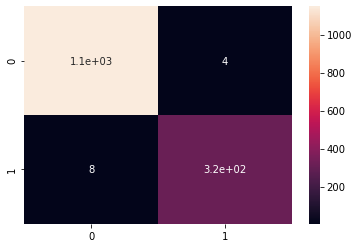

In [120]:
sns.heatmap(confusion_matrix(y_test,model.predict(X_test_scaled)),annot=True)

#### We need to reduce the FN because if the transaction was fraud and our model predicted it to be non-fraud it will be a problem  (According to Domain Knowledge)

In [125]:
pred = []
for i in model.predict_proba(X_test_scaled)[:,1]:
    if i > 0.45:
        pred.append(1)
    else:
        pred.append(0)

<AxesSubplot:>

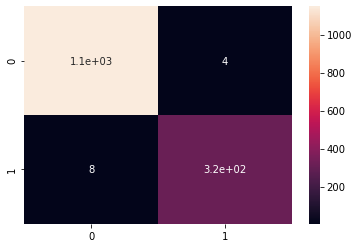

In [126]:
sns.heatmap(confusion_matrix(y_test,pred),annot=True)

# saving the model as pickle file

In [127]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [129]:
#import pickle
#pickle.dump(model, open('XGBoost_model_oversampler.pkl', 'wb'))

## Conclusion

We did training and prediction using all the above models and selected random forest as final model as it performed well compard to other models with acurracy of 99%.

According to this model, the predicted value we got,
matches with the actual target values. We can see that in confusion matrix.

We have performed EDA, preprocessing, build different models, visualized feature importance, hyper parameter tunning and did prediction.

We also perform necessary operations to handle imbalanced and skewed nature of data. 